In [13]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

## Inspect the voxel size of the fMRI scan

In [14]:
# nii = nib.load("/home/iris/yg5d6/Workspace/IXI_dataset/IXI588-IOP-1158-T1.nii")
nii = nib.load("data/IXI_10x10x10/swc1IXI588-IOP-1158-T1.nii")
voxel_size = nii.header.get_zooms()
image_shape = np.array(nii.shape)
image = nii.get_fdata() 
print(f"Voxel Size: {voxel_size}")
print(f"Image Shape: {image_shape}")

Voxel Size: (2.0, 2.0, 2.0)
Image Shape: [79 95 79]


## Preprocessing Demonstration 

### 1. centering and cropping

In [25]:
# randomly shift the center by 0, 1, 2 along every axis
center = image_shape // 2
print(center)
shift = np.random.randint(-2,3,size=(3,))
center = center + shift 
print(shift)
print(center)

# In order to run network efficiently, the input image dim size is best as multiples of 8
sub_shape = (image_shape // 8)*8

start = center - sub_shape // 2
end = start + sub_shape

# Extract the sub-volume
image_sub = image[start[0]:end[0], start[1]:end[1], start[2]:end[2]]

[39 47 39]
[-2  1  2]
[37 48 41]


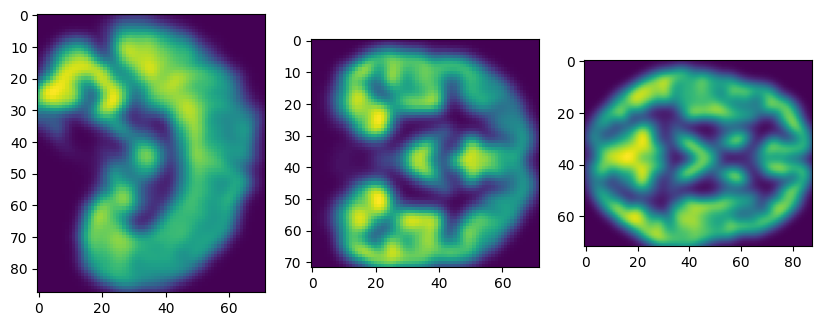

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 30))
axs[0].imshow(image_sub[36,: ,:])
axs[1].imshow(image_sub[: ,44,:])
axs[2].imshow(image_sub[: ,: ,36])
plt.show()

### 2. mirroring along the sagittal plane

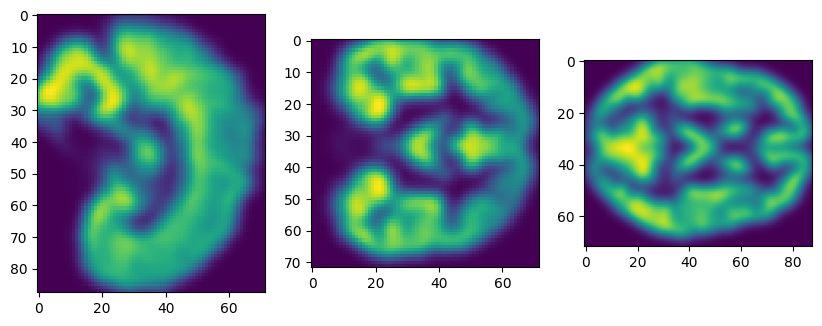

In [27]:
# assuming the first dim of the image since it seems to be symmetrical along that dim
image_sub_mirrored = image_sub[::-1,:,:]
# image_sub_mirrored = image_sub[:,::-1,:]
# image_sub_mirrored = image_sub[:,:,::-1]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 30))
axs[0].imshow(image_sub_mirrored[36,: ,:])
axs[1].imshow(image_sub_mirrored[: ,44,:])
axs[2].imshow(image_sub_mirrored[: ,: ,36])
plt.show()